In [1]:
# Set of the environment for the cluster analysis

# Matlib utilities to plot
# %matplotlib allows to direct output in the Notebook

%matplotlib inline
import matplotlib.pyplot as plt
# import matplotlib as mpl

# numpy and pyemma utilities

import numpy as np
import pyemma

import csv
import pandas as pd

from openeye import oechem


In [2]:
# Set the files name
# pdb is the file that will be used to set the features (mol2 format is not recognized)
# dcd is the output of the conformational analysis
# - PyEMMA uses tools tailored for MD trajectories so it is mandatory to transform the multimol2 file with all conformations
#   in a trajectory, dcd is a trajectory format
# - Use Vega to save the pdb file of the first conformer and to convert the multimol2 file in a dcd file

pdb = 'PROTAC1_sz_chl_c1.pdb'
files = 'PROTAC1_sz_chl.dcd'
print(pdb)
print(files)

PROTAC1_sz_chl_c1.pdb
PROTAC1_sz_chl.dcd


In [3]:
# Setting of the features that will be used in PyEMMA to clusterize to conformations
# - here we will use the torsion angles

# In torsion_feat the cossin option is selected because it is recommended for cluster analysis 

torsions_feat = pyemma.coordinates.featurizer(pdb)

torsions_feat.add_dihedrals([[ 0 , 12 , 19 , 21 ],
                             [ 2 , 13 , 22 , 54 ],
                             [ 4 , 14 , 40 , 56 ],
                             [ 6 , 17 , 66 , 49 ],
                             [ 8 , 18 , 65 , 41 ],
                             [52 , 20 , 33 , 27 ],
                             [56 , 23 , 34 , 29 ],
                             [55 , 24 , 47 , 48 ],
                             [57 , 25 , 41 , 65 ],
                             [58 , 26 , 42 , 67 ],
                             [14 , 40 , 56 , 23 ],
                             [25 , 41 , 65 , 18 ],
                             [26 , 42 , 67 , 45 ],
                             [57 , 43 , 44 , 68 ],
                             [44 , 43 , 57 , 25 ],
                             [43 , 44 , 68 , 46 ],
                             [67 , 45 , 46 , 68 ],
                             [46 , 45 , 67 , 42 ],
                             [45 , 46 , 68 , 44 ],
                             [58 , 47 , 48 , 37 ],
                             [24 , 47 , 58 , 26 ],
                             [13 , 22 , 54 , 30 ],
                             [34 , 55 , 24 , 47 ],
                             [63 , 26 , 58 , 47 ]], cossin=True, periodic=False)

torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
print ('Torsion cossin: ', torsions_data.shape)
                             
# In torsion_feat_nocossin simple torsion angles are used, this option is preferred for distribution plots
                             
torsions_feat_nocossin = pyemma.coordinates.featurizer(pdb)
                                                          
torsions_feat_nocossin.add_dihedrals([[ 0 , 12 , 19 , 21 ],
                             [ 2 , 13 , 22 , 54 ],
                             [ 4 , 14 , 40 , 56 ],
                             [ 6 , 17 , 66 , 49 ],
                             [ 8 , 18 , 65 , 41 ],
                             [52 , 20 , 33 , 27 ],
                             [56 , 23 , 34 , 29 ],
                             [55 , 24 , 47 , 48 ],
                             [57 , 25 , 41 , 65 ],
                             [58 , 26 , 42 , 67 ],
                             [14 , 40 , 56 , 23 ],
                             [25 , 41 , 65 , 18 ],
                             [26 , 42 , 67 , 45 ],
                             [57 , 43 , 44 , 68 ],
                             [44 , 43 , 57 , 25 ],
                             [43 , 44 , 68 , 46 ],
                             [67 , 45 , 46 , 68 ],
                             [46 , 45 , 67 , 42 ],
                             [45 , 46 , 68 , 44 ],
                             [58 , 47 , 48 , 37 ],
                             [24 , 47 , 58 , 26 ],
                             [13 , 22 , 54 , 30 ],
                             [34 , 55 , 24 , 47 ],
                             [63 , 26 , 58 , 47 ]], cossin=True, periodic=False)

torsions_data_nocossin = pyemma.coordinates.load(files, features=torsions_feat_nocossin)
print ('Torsion no cossin: ', torsions_data_nocossin.shape)

Torsion cossin:  (13782, 48)
Torsion no cossin:  (13782, 48)


In [4]:
# Export the torsional angle values in a file for furhter analysis
# Both date are saved even if the no cossin is preferred
# with saves the labels
# np.savetxt saves the data

with open('PROTAC1_sz_chl_tors_labels.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(torsions_feat.active_features)

np.savetxt('PROTAC1_sz_chl_tors_data.csv', torsions_data, delimiter=';')

with open('PROTAC1_sz_chl_tors_label_noCossin.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(torsions_feat_nocossin.active_features)

np.savetxt('PROTAC1_sz_chl_tors_data_noCossin.csv', torsions_data_nocossin, delimiter=';')

Text(0.5, 0, 'Dim')

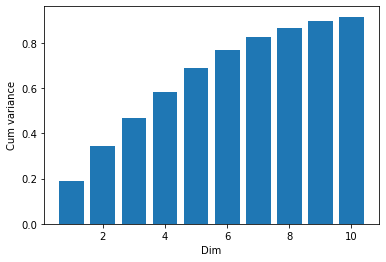

In [5]:
# Performing PCA using torsional angles

pca = pyemma.coordinates.pca(torsions_data, dim=-1)
npca=10
y_pos = np.arange(len(pca.cumvar[:npca]))
y_pos = y_pos + 1
plt.bar(y_pos, pca.cumvar[:npca])
plt.ylabel('Cum variance')
plt.xlabel('Dim')

In [6]:
# Performing the cluster analysis using torsional data and NOT PCA

cluster_kmeans = pyemma.coordinates.cluster_kmeans(torsions_data, k=100, max_iter=50, stride=1)

initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Feature values'>)

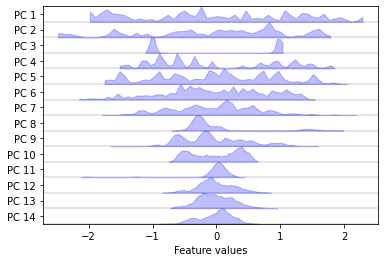

In [7]:
# Plotting of PCs

pca_concatenated = np.concatenate(pca.get_output())
pyemma.plots.plot_feature_histograms(pca_concatenated, ['PC {}'.format(i + 1) for i in range(pca.dimension())])


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

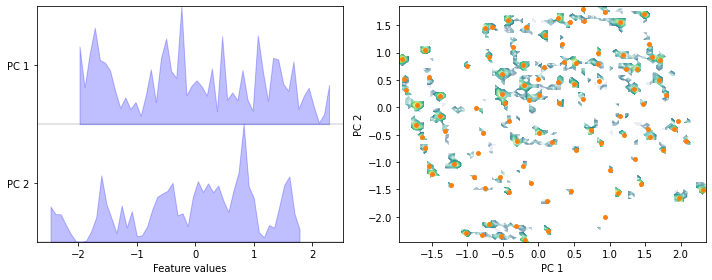

In [12]:
# Plotting the cluster in the PC1 vs PC2 plane

pca = pyemma.coordinates.pca(torsions_data, dim=2)
pca_concatenated = np.concatenate(pca.get_output())

cluster = pyemma.coordinates.cluster_kmeans(pca, k=100, max_iter=50, stride=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    pca_concatenated, ['PC {}'.format(i + 1) for i in range(pca.dimension())], ax=axes[0])
pyemma.plots.plot_density(*pca_concatenated.T, ax=axes[1], cbar=False, alpha=0.1, logscale=True)
axes[1].scatter(*cluster.clustercenters.T, s=15, c='C1')

axes[1].set_xlabel('PC 1')
axes[1].set_ylabel('PC 2')
fig.tight_layout()

In [14]:
cluster.write_to_csv("cluster100_PCA.out")
cluster_kmeans.write_to_csv("cluster100_Torsions.out")

In [15]:
# Reading mol2 molecules

moldb = oechem.OEMolDatabase()
moldb.Open("PROTAC1_sz_chl.mol2")
moldb.NumMols()


13782

In [26]:
# Reading file with cluster and energy data
# - the file has to be manually prepared

columns = ["Confs", "Cluster", "Energy"]
df = pd.read_csv("PROTAC1_sz_chl_ConfsClusterEnergy_Tors.txt", usecols=columns)

# Sorting of cluster and energy in each cluster

df_sorted = df.sort_values(by=["Cluster", "Energy"])
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head()

,Confs,Cluster,Energy
0,10899,0,166.86671
1,4037,0,166.87345
2,6961,0,167.32544
3,5334,0,167.44945
4,3060,0,167.53678


In [27]:
# Definition of clusters

cl = set(df_sorted.Cluster)
cl_list = []
for n in cl:
    cl_list.append(n)


In [28]:
# Writing molecules belonging to the different clusters in mol2 files

for idx in cl_list:
    
    ofs = oechem.oemolostream()
    fi = 'cluster_'+ str(idx) + '.mol2'
    ofs.open(fi)

    for idx_mol in range(moldb.GetMaxMolIdx()):

        if df_sorted.Cluster[idx_mol] == idx:

            moldb.WriteMolecule(ofs, int(df_sorted.Confs[idx_mol])-1)
    
            
    ofs.close()
    
    with open(fi) as f:
        lines = f.readlines()
        lines[0] = "@<TRIPOS>MOLECULE\n"
        lines[len(lines)-1] = ""

    with open(fi, "w") as f:
        f.writelines(lines)
    
    f.close()
    
    ifs = oechem.oemolistream()
    ofs_min = oechem.oemolostream()
    
    ifs.open(fi)
    fi_min = 'cluster_'+ str(idx) + '_min.mol2'
    ofs_min.open(fi_min)

    for mol in ifs.GetOEGraphMols():
        flag = 0
        if flag == 0:
            oechem.OEWriteMolecule(ofs_min, mol)
            break

    ofs_min.close()